In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


2026-01-07 15:56:48.559458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767801408.596870    3639 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767801408.610895    3639 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767801408.650360    3639 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767801408.650423    3639 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767801408.650425    3639 computation_placer.cc:177] computation placer alr

# Load The Dataset

In [2]:
import kagglehub
path = kagglehub.dataset_download("ssinon/covertype")

cov_type = pd.read_csv('/kaggle/input/covertype/covtype.csv') 
cov_type.T

,0,1,2,3,4,5,6,7,8,9,...,581002,581003,581004,581005,581006,581007,581008,581009,581010,581011
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612,...,2419,2415,2410,2405,2401,2396,2391,2386,2384,2383
Aspect,51,56,139,155,45,132,45,49,45,59,...,168,161,158,159,157,153,152,159,170,165
Slope,3,2,9,18,2,6,7,4,9,10,...,25,25,24,22,21,20,19,17,15,13
Horizontal_Distance_To_Hydrology,258,212,268,242,153,300,270,234,240,247,...,108,95,90,90,90,85,67,60,60,60
Vertical_Distance_To_Hydrology,0,-6,65,118,-1,-15,5,7,56,11,...,33,29,24,19,15,17,12,7,5,4
Horizontal_Distance_To_Roadways,510,390,3180,3090,391,67,633,573,666,636,...,124,120,120,120,120,108,95,90,90,67
Hillshade_9am,221,220,234,238,220,230,222,222,223,228,...,230,236,238,237,238,240,240,236,230,231
Hillshade_Noon,232,235,238,238,234,237,225,230,221,219,...,240,237,236,238,238,237,237,241,245,244
Hillshade_3pm,148,151,135,122,150,140,138,144,133,124,...,126,116,115,119,119,118,119,130,143,141
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172,6031,6256,6228,6244,6230,...,812,815,819,824,830,837,845,854,864,875


In [3]:
X = cov_type.drop('Cover_Type', axis=1).values
y = cov_type['Cover_Type'].values - 1   # Convert labels 1–7 → 0–6

print(X.shape, y.shape)

(581012, 54) (581012,)


## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature Scaling

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baseline MLP Model

### 1. Architecture


In [6]:
baseline_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_baseline = baseline_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=1024,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-07 15:56:57.139538: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6138 - loss: 0.9538 - val_accuracy: 0.7468 - val_loss: 0.5884
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7593 - loss: 0.5682 - val_accuracy: 0.7714 - val_loss: 0.5345
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7787 - loss: 0.5199 - val_accuracy: 0.7861 - val_loss: 0.5000
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7944 - loss: 0.4858 - val_accuracy: 0.7967 - val_loss: 0.4801
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8039 - loss: 0.4652 - val_accuracy: 0.8125 - val_loss: 0.4480
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8156 - loss: 0.4392 - val_accuracy: 0.8184 - val_loss: 0.4314
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8209 - loss: 0.4271 - val_accuracy: 0.8250 - val_loss: 0.4176
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8282 - loss: 0.4116 - val_accuracy: 0.

### 2. Test Accuracy

In [7]:
# Predict on test set
y_pred_baseline = np.argmax(baseline_model.predict(X_test), axis=1)

# Accuracy
baseline_acc = accuracy_score(y_test, y_pred_baseline)
print("Baseline Test Accuracy:", baseline_acc)


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Baseline Test Accuracy: 0.8623185287815289


### 3. Precision, Recall, F1-Score

In [8]:
print("\nBaseline Classification Report:\n")
print(classification_report(y_test, y_pred_baseline))



Baseline Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     42368
           1       0.88      0.89      0.88     56661
           2       0.81      0.88      0.84      7151
           3       0.85      0.65      0.74       549
           4       0.75      0.44      0.56      1899
           5       0.72      0.62      0.67      3473
           6       0.91      0.85      0.88      4102

    accuracy                           0.86    116203
   macro avg       0.83      0.74      0.78    116203
weighted avg       0.86      0.86      0.86    116203



### 4. Confusion Matrix

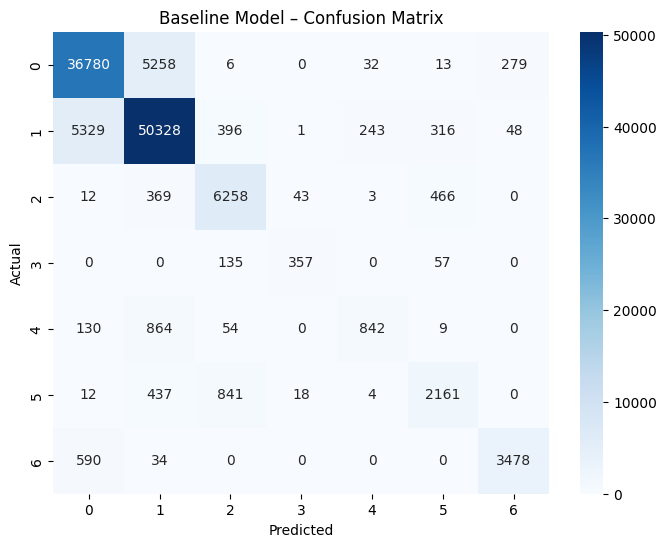

In [9]:
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(8,6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues')
plt.title("Baseline Model – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 5. Baseline Training Curve (Accuracy & Loss)

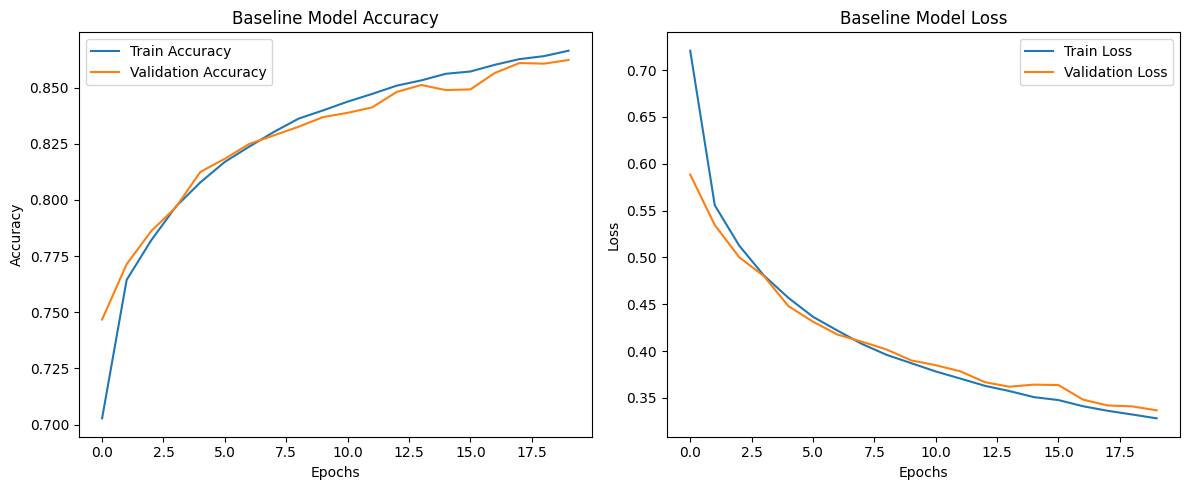

In [10]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_baseline.history['accuracy'], label='Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.title("Baseline Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.title("Baseline Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


## Tuned Model

### 1. Architecture

In [11]:
tuned_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(7, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
tuned_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,479 (224.53 KB)

 Trainable params: 56,583 (221.03 KB)

 Non-trainable params: 896 (3.50 KB)

### 2. Optimizer and Learning Rate Strategy

In [13]:
tuned_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### 3. Training Management (Callbacks)

In [14]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)


### 4. Model Training 

In [15]:
history_tuned = tuned_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=1024,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)


Epoch 1/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5920 - loss: 1.5367 - val_accuracy: 0.7301 - val_loss: 0.8480 - learning_rate: 0.0010
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7290 - loss: 0.8250 - val_accuracy: 0.7580 - val_loss: 0.6723 - learning_rate: 0.0010
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7530 - loss: 0.6753 - val_accuracy: 0.7841 - val_loss: 0.5769 - learning_rate: 0.0010
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7673 - loss: 0.6072 - val_accuracy: 0.8030 - val_loss: 0.5228 - learning_rate: 0.0010
Epoch 5/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7779 - loss: 0.5721 - val_accuracy: 0.8138 - val_loss: 0.4893 - learning_rate: 0.0010
Epoch 6/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7881 - loss: 0.5485 - val_accuracy: 0.8214 - val_loss: 0.4700 - learning_rate: 0.0010
Epoch 7/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7918 - loss: 0

### 5. Tuned Model Evaluation

In [16]:
y_pred_tuned = np.argmax(tuned_model.predict(X_test), axis=1)

tuned_acc = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Test Accuracy:", tuned_acc)


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Tuned Model Test Accuracy: 0.8825503644484222


### 6. Precision, Recall, F1-Score

In [17]:
print("\nTuned Model Classification Report:\n")
print(classification_report(y_test, y_pred_tuned))



Tuned Model Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     42368
           1       0.88      0.93      0.90     56661
           2       0.84      0.88      0.86      7151
           3       0.93      0.52      0.67       549
           4       0.73      0.62      0.67      1899
           5       0.75      0.74      0.75      3473
           6       0.89      0.89      0.89      4102

    accuracy                           0.88    116203
   macro avg       0.85      0.78      0.80    116203
weighted avg       0.88      0.88      0.88    116203



### 7. Confusion Matrix

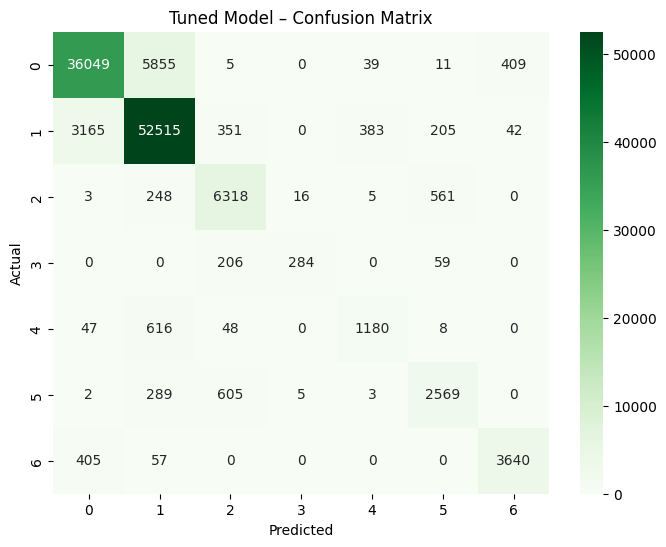

In [18]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8,6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title("Tuned Model – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 8. Tuned Model Training Curves 

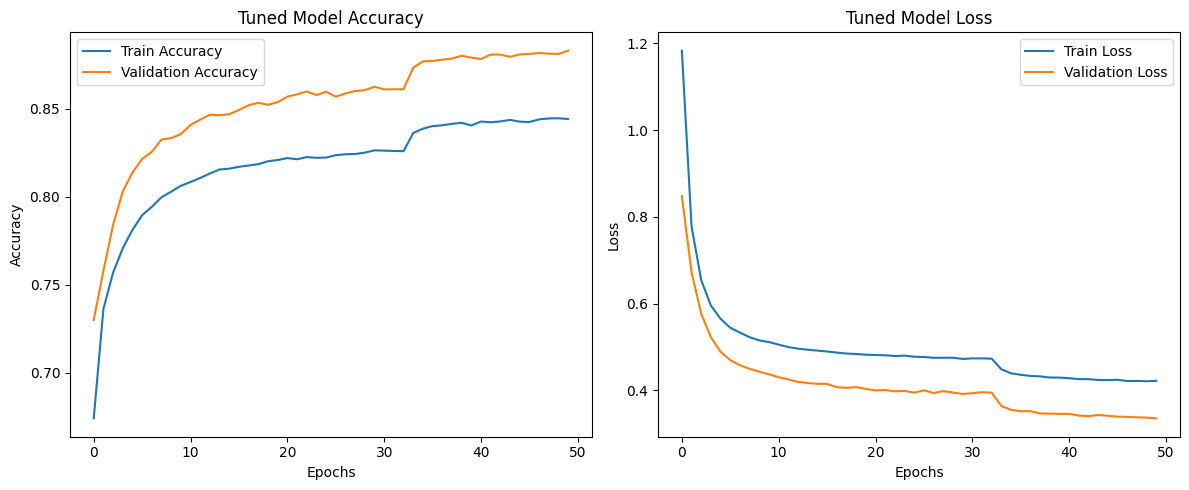

In [19]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Accuracy')
plt.title("Tuned Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_tuned.history['loss'], label='Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title("Tuned Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


## Baseline VS Tuned Model Comparison

In [20]:
print("Baseline Accuracy:", baseline_acc)
print("Tuned Model Accuracy:", tuned_acc)


Baseline Accuracy: 0.8623185287815289
Tuned Model Accuracy: 0.8825503644484222


## Hyperparameter Tuned Model 
### 1. Architecture

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),

    Dense(7, activation='softmax')
])


### 2. Optimizier & Learning Rate Strategy

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-5,
    verbose=1
)


In [32]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)


### 3. Handle Class Imbalance 

In [33]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: np.float64(0.39181272253992233), 1: np.float64(0.29298131712974634), 2: np.float64(2.3214797648598298), 3: np.float64(30.209866112049916), 4: np.float64(8.743914368486399), 5: np.float64(4.779133850171708), 6: np.float64(4.046884794873581)}


### 4. Trained Hyperparameter Trained Model

In [34]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=1024,
    callbacks=[early_stop, lr_scheduler],
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.5398 - loss: 0.9615 - val_accuracy: 0.7173 - val_loss: 0.6995 - learning_rate: 0.0030
Epoch 2/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.6628 - loss: 0.6509 - val_accuracy: 0.7112 - val_loss: 0.7382 - learning_rate: 0.0030
Epoch 3/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6915 - loss: 0.6058 - val_accuracy: 0.7029 - val_loss: 0.7807 - learning_rate: 0.0030
Epoch 4/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7084 - loss: 0.5753 - val_accuracy: 0.7415 - val_loss: 0.6824 - learning_rate: 0.0030
Epoch 5/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.7204 - loss: 0.5576 - val_accuracy: 0.7585 - val_loss: 0.6765 - learning_rate: 0.0030
Epoch 6/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.7294 - loss: 0.5441 - val_accuracy: 0.7527 - val_loss: 0.6916 - learning_rate: 0.0030
Epoch 7/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.7


#### Despite architectural tuning, the MLP converged at approximately 88% accuracy, indicating limited capacity for modeling complex feature interactions in structured data. In contrast, Random Forest achieved significantly higher performance (approximately 93%), highlighting the superiority of ensemble tree-based methods for tabular datasets due to their ability to model non-linear splits and feature hierarchies without manual feature engineering.

## Random Forest 

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9311033277970449


## Optimized RF

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Op_rf = RandomForestClassifier(
    n_estimators=800,          # more trees
    max_depth=None,           # allow full growth
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',      # better generalization
    class_weight='balanced',  # handle imbalance
    n_jobs=-1,
    random_state=42
)

Op_rf.fit(X_train, y_train)
y_pred_rf = Op_rf.predict(X_test)

print("Optizimed Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Optizimed Random Forest Accuracy: 0.9556896121442647


## XGBoost 

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(
    n_estimators=1200,        # more trees
    max_depth=12,            # deeper trees
    learning_rate=0.03,      # slower learning
    subsample=0.9,
    colsample_bytree=0.9,
    objective='multi:softprob',  # IMPORTANT
    num_class=7,
    eval_metric='mlogloss',
    min_child_weight=5,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9669457759266112


#### Despite extensive tuning, the MLP saturated at approximately 88% accuracy, indicating a performance ceiling for neural networks on structured tabular data. In contrast, ensemble tree-based methods significantly outperformed the neural network. An optimized Random Forest achieved 95.6% accuracy, while XGBoost further improved performance to 96.7% by sequentially correcting errors and modeling complex feature interactions. This confirms that boosting and bagging methods are better suited for tabular datasets than standard MLP architectures.